# **H1B VISA DATA ANALYSIS: AN EXPLORATORY ANALYSIS ON THE FACTORS AFFECTING THE APPROVAL OF H1B VISAS**

1. This project intended to explain a clear trend, variation, and patterns about the H1-B visa application process over the period of time. 
2. We have collected data from Kaggle to analyze which factors influences the approval of H1-B visa for the non-immigrants to work legally in the United States. 
3. We have acquired the dataset from the year 2016 till 2018 which contained around 10 lakhs H1B Visa petitions.

## Approach:
1. Normalized dataset acquired and transformed it into database named 'H1B_Normalized'
   ### Table Structures:
    1. **SOC**:
          *Columns*:
              SOC_ID
              SOC_NAME
          
    2. **JOB**:
          *Columns*:
              JOB_ID
              JOB_TITLE
              
    3. **CASE_STATUS**:
          *Columns*:
              STATUS_ID
              STATUS_DESC
              
    4. **EMPLOYER**:
          *Columns*:
              EMPLOYER_ID
              EMPLOYER_NAME
              EMPLOYER_STATE
              SOC_ID
              
    5. **EMPLOYEE_CASE**:
          *Columns*:
              CASE_ID
              CASE_YEAR
              EMPLOYER_ID
              EMPLOYMENT_START_DATE
              PREVAILING WAGE
              JOB_ID
              CASE_STATUS_ID
              
2. Data visualization using seaborn and matplotlib

In [1]:
### Utility Functions
from IPython.display import display, HTML
import pandas as pd
import sqlite3
from sqlite3 import Error

def create_connection(db_file, delete_db = None):
    import os
    if delete_db and os.path.exists(db_file):
        os.remove(db_file)

    conn = None
    try:
        conn = sqlite3.connect(db_file)
        conn.execute("PRAGMA foreign_keys = 1")
    except Error as e:
        print(e)

    return conn


def create_table(conn, create_table_sql, drop_table_name = None):
    
    if drop_table_name: # You can optionally pass drop_table_name to drop the table. 
        try:
            c = conn.cursor()
            c.execute("""DROP TABLE IF EXISTS %s""" % (drop_table_name))
        except Error as e:
            print(e)
    
    try:
        c = conn.cursor()
        c.execute(create_table_sql)
    except Error as e:
        print(e)
        
def execute_sql_statement(sql_statement, conn):
    cur = conn.cursor()
    cur.execute(sql_statement)

    rows = cur.fetchall()

    return rows

In [2]:
def step1_creating_original_table(normalized_database_filename):
    create_table_sql='CREATE TABLE H1B(Case_ID integer PRIMARY KEY AUTOINCREMENT, Case_Status text,EMPLOYMENT_START_DATE text,EMPLOYER_NAME text, EMPLOYER_STATE text ,Job_Title text, SOC_NAME Text,Prevailing_Wage text, Case_Year text )'
    create_table(conn, create_table_sql, drop_table_name = "H1B")
    sql_statement = 'INSERT INTO H1B (Case_Status,EMPLOYMENT_START_DATE,EMPLOYER_NAME,EMPLOYER_STATE,Job_Title,SOC_NAME,Prevailing_Wage,Case_Year) VALUES(?,?,?,?,?,?,?,?)'
    filename1='h1b16.csv'
    filename2='h1b17.csv'
    filename3='h1b18.csv'
    with open(filename1,'r') as file:
        lines = [line.rstrip('\n').split(',')[1:8] for line in file]
        for line in lines:
            line.append('2016')
        cur.executemany(sql_statement,lines)
        conn.commit()
    with open(filename2,'r') as file:
        lines = [line.rstrip('\n').split(',')[1:8] for line in file]
        for line in lines:
            line.append('2017')
        cur.executemany(sql_statement,lines)
        conn.commit()
    with open(filename3,'r') as file:
        lines = [line.rstrip('\n').split(',')[1:8] for line in file]
        for line in lines:
            line.append('2018')
        cur.executemany(sql_statement,lines)  
        conn.commit()

In [3]:
normalized_database_filename = 'normalized_2.db'
conn = create_connection(normalized_database_filename)
cur = conn.cursor()
df1 = step1_creating_original_table(normalized_database_filename)
sql_statement = "select * from H1B;"
df = execute_sql_statement(sql_statement, conn)
display(df)

[(1,
  'CASE_STATUS',
  'EMPLOYMENT_START_DATE',
  'EMPLOYER_NAME',
  'EMPLOYER_STATE',
  'JOB_TITLE',
  'SOC_NAME',
  'PREVAILING_WAGE',
  '2016'),
 (2,
  'CERTIFIED-WITHDRAWN',
  '2016',
  'UNIVERSITY OF MICHIGAN',
  'MI',
  'POSTDOCTORAL RESEARCH FELLOW',
  'BIOCHEMISTS AND BIOPHYSICISTS',
  '36067',
  '2016'),
 (3,
  'CERTIFIED-WITHDRAWN',
  '2016',
  'GOODMAN NETWORKS  INC.',
  'TX',
  'CHIEF OPERATING OFFICER',
  'CHIEF EXECUTIVES',
  '242674',
  '2016'),
 (4,
  'CERTIFIED-WITHDRAWN',
  '2016',
  'PORTS AMERICA GROUP  INC.',
  'NJ',
  'CHIEF PROCESS OFFICER',
  'CHIEF EXECUTIVES',
  '193066',
  '2016'),
 (5,
  'CERTIFIED-WITHDRAWN',
  '2016',
  'GATES CORPORATION  A WHOLLY-OWNED SUBSIDIARY OF TOMKINS PLC',
  'CO',
  'REGIONAL PRESIDENT  AMERICAS',
  'CHIEF EXECUTIVES',
  '220314',
  '2016'),
 (6,
  'WITHDRAWN',
  '2016',
  'PEABODY INVESTMENTS CORP.',
  'MO',
  'PRESIDENT MONGOLIA AND INDIA',
  'CHIEF EXECUTIVES',
  '157518.4',
  '2016'),
 (7,
  'CERTIFIED-WITHDRAWN',
  '2016',
 

In [4]:
def step2_creating_SOC_table(normalized_database_filename):
    create_table_sql = 'CREATE TABLE SOC ( SOC_ID integer NOT NULL PRIMARY KEY AUTOINCREMENT , SOC_NAME Text NOT NULL )'
    create_table (conn, create_table_sql, drop_table_name = "SOC")
    sql_statement = 'INSERT INTO SOC (SOC_NAME) VALUES(?)'
    soc = [i[6].strip() for i in df]
    soc = list(set(soc))
    soc.sort()
    soc_tup = ()
    for a in soc:
        s = ()
        s = s + (a,)
        soc_tup = soc_tup + (s,)
    cur.executemany(sql_statement,soc_tup)
    conn.commit()

In [5]:
normalized_database_filename = 'H1B_Normalized.db'
conn = create_connection(normalized_database_filename)
cur = conn.cursor()
df2 = step2_creating_SOC_table(normalized_database_filename)
sql_statement = "select * from SOC;"
df_soc = execute_sql_statement(sql_statement, conn)
display(df_soc)

[(1, '"'),
 (2, '".NET'),
 (3, '".NET DEVELOPER'),
 (4, '"2ND VICE PRESIDENT'),
 (5, '"3D ARTIST'),
 (6, '"3D POINTCLOUD TEAM ASSISTANT MANAGER'),
 (7, '": ENGINEER  MATERIALS SCIENCE ENGINEERING'),
 (8, '"ACCOUNT ANALYST'),
 (9, '"ACCOUNT ASSOCIATE'),
 (10, '"ACCOUNT DIRECTOR'),
 (11, '"ACCOUNT EXECUTIVE'),
 (12, '"ACCOUNT MANAGER'),
 (13, '"ACCOUNTANT'),
 (14, '"ACCOUNTANT I'),
 (15, '"ACCOUNTANT/COORDINATOR'),
 (16, '"ACCOUNTING COORDINATOR'),
 (17, '"ACCOUNTING MANAGER'),
 (18, '"ACCOUNTING PRINCIPAL'),
 (19, '"ACCOUNTING SPECIALIST'),
 (20, '"ACCOUNTS MANAGER'),
 (21, '"ACS SERVICES'),
 (22, '"ACTUARIAL ANALYST EXPERIENCED'),
 (23, '"ACTUARIAL CONSULTANT I'),
 (24, '"ACTUARY'),
 (25, '"AD'),
 (26, '"ADAMA PARTNERS'),
 (27, '"ADMINISTRATIVE ASSOCIATE'),
 (28, '"ADMINISTRATOR'),
 (29, '"ADMINISTRATOR 3'),
 (30, '"ADMINISTRATOR 4'),
 (31, '"ADMISSIONS AND OPERATIONS MANAGER'),
 (32, '"ADVANCED ANALYTICS'),
 (33, '"ADVANCED ANALYTICS CONSULTANT'),
 (34, '"ADVANCED ANALYTICS MANAGER'),

In [6]:
def step3_create_SOC_to_SOCid_dictionary(normalized_database_filename):
    sql_statement = "SELECT * FROM SOC;"
    soc_fetch = execute_sql_statement(sql_statement, conn)
    soc_dict = dict((soc_name,soc_id) for soc_id, soc_name in soc_fetch)
    return soc_dict

In [7]:
normalized_database_filename = 'H1B_Normalized.db'
conn = create_connection(normalized_database_filename)
cur = conn.cursor()
df3_soc_dict = step3_create_SOC_to_SOCid_dictionary(normalized_database_filename)
display(df3_soc_dict)

{'"': 1,
 '".NET': 2,
 '".NET DEVELOPER': 3,
 '"2ND VICE PRESIDENT': 4,
 '"3D ARTIST': 5,
 '"3D POINTCLOUD TEAM ASSISTANT MANAGER': 6,
 '": ENGINEER  MATERIALS SCIENCE ENGINEERING': 7,
 '"ACCOUNT ANALYST': 8,
 '"ACCOUNT ASSOCIATE': 9,
 '"ACCOUNT DIRECTOR': 10,
 '"ACCOUNT EXECUTIVE': 11,
 '"ACCOUNT MANAGER': 12,
 '"ACCOUNTANT': 13,
 '"ACCOUNTANT I': 14,
 '"ACCOUNTANT/COORDINATOR': 15,
 '"ACCOUNTING COORDINATOR': 16,
 '"ACCOUNTING MANAGER': 17,
 '"ACCOUNTING PRINCIPAL': 18,
 '"ACCOUNTING SPECIALIST': 19,
 '"ACCOUNTS MANAGER': 20,
 '"ACS SERVICES': 21,
 '"ACTUARIAL ANALYST EXPERIENCED': 22,
 '"ACTUARIAL CONSULTANT I': 23,
 '"ACTUARY': 24,
 '"AD': 25,
 '"ADAMA PARTNERS': 26,
 '"ADMINISTRATIVE ASSOCIATE': 27,
 '"ADMINISTRATOR': 28,
 '"ADMINISTRATOR 3': 29,
 '"ADMINISTRATOR 4': 30,
 '"ADMISSIONS AND OPERATIONS MANAGER': 31,
 '"ADVANCED ANALYTICS': 32,
 '"ADVANCED ANALYTICS CONSULTANT': 33,
 '"ADVANCED ANALYTICS MANAGER': 34,
 '"ADVANCED ENGINEER': 35,
 '"ADVANCED SOLUTION LEAD': 36,
 '"ADVAN

In [8]:
def step4_creating_employer(normalized_database_filename):
    create_table_sql='CREATE TABLE EMPLOYER ( EMPLOYER_ID integer NOT NULL PRIMARY KEY AUTOINCREMENT , EMPLOYER_NAME Text NOT NULL, EMPLOYER_STATE Text NOT NULL, SOC_ID INTEGER NOT NULL, FOREIGN KEY (SOC_ID) REFERENCES SOC(SOC_ID) )'
    create_table(conn, create_table_sql,drop_table_name = "EMPLOYER")
    sql_statement = 'INSERT INTO EMPLOYER (EMPLOYER_NAME, EMPLOYER_STATE, SOC_ID) VALUES(?,?,?)'
    employer_row=[]
    for row in df[1:]:
        row = list(row)
        employer_row.append((row[3].strip(),row[4].strip(),df3_soc_dict[row[6].strip()]))
    employer_row.sort(key = lambda x: x[0])
    cur.executemany(sql_statement,tuple(set(employer_row)))
    conn.commit()

In [9]:
normalized_database_filename = 'H1B_Normalized.db'
conn = create_connection(normalized_database_filename)
cur = conn.cursor()
df4 = step4_creating_employer(normalized_database_filename)
sql_statement = "select * from EMPLOYER;"
df_emp = execute_sql_statement(sql_statement, conn)
display(df_emp)

[(1, 'BRADLEYSCOTT RESOURCES', 'NJ', 27894),
 (2, 'SERVEONE CO LTD', 'TN', 6121),
 (3, 'DIXON HUGHES GOODMAN LLP', 'VA', 3559),
 (4, 'INNOVATUM  INC.', 'GA', 14408),
 (5, 'PRAXAIR  INC.', 'NY', 14408),
 (6, 'HEXAWARE TECHNOLOGIES  INC.', 'DISTRICT OF COLUMBIA', 14143),
 (7, 'GRAVITON SOLUTIONS  INC', 'FL', 60076),
 (8, 'CORSAIR MEMORY  INC.', 'CA', 3559),
 (9, '"ESURANCE INSURANCE SERVICES', 'INC."', 42646),
 (10, '"SULPHUR EXPERTS INTERNATIONAL', 'INC."', 55796),
 (11, '"TURBINE CORPORATE HOLDINGS', 'INC."', 48684),
 (12, '"MITSUBISHI ELECTRIC RESEARCH LABORATORIES', 'INC."', 42196),
 (13, 'SRI MOONLIGHT SOFTWARE SOLUTIONS LLC', 'PA', 17414),
 (14, 'CASE WESTERN RESERVE UNIVERSITY', 'OH', 12148),
 (15, '"VITECH SYSTEMS GROUP', 'INC."', 61976),
 (16, 'REPEQUITY  LLC', 'DISTRICT OF COLUMBIA', 60076),
 (17, 'ANTRA INC.', 'MD', 73368),
 (18, 'MSX INTERNATIONAL STAFFING LLC', 'MI', 36487),
 (19, 'NARC IT', 'NY', 516),
 (20, 'PHYSICIANS INTERACTIVE INC.', 'MA', 60076),
 (21, '"MINDSPAN SYST

In [10]:
def step5_create_Employer_to_Employer_id_dictionary(normalized_database_filename):
    sql_statement = "SELECT EMPLOYER_ID, EMPLOYER_NAME FROM EMPLOYER;"
    emr_fetch = execute_sql_statement(sql_statement, conn)
    emr_dict = dict((employer_name,employer_id) for employer_id, employer_name in emr_fetch)
    return emr_dict

In [11]:
normalized_database_filename = 'H1B_Normalized.db'
Employer_to_Employerid = step5_create_Employer_to_Employer_id_dictionary(normalized_database_filename)
display(Employer_to_Employerid)

{'BRADLEYSCOTT RESOURCES': 1,
 'SERVEONE CO LTD': 455846,
 'DIXON HUGHES GOODMAN LLP': 467004,
 'INNOVATUM  INC.': 4,
 'PRAXAIR  INC.': 501690,
 'HEXAWARE TECHNOLOGIES  INC.': 534140,
 'GRAVITON SOLUTIONS  INC': 278450,
 'CORSAIR MEMORY  INC.': 267645,
 '"ESURANCE INSURANCE SERVICES': 536073,
 '"SULPHUR EXPERTS INTERNATIONAL': 10,
 '"TURBINE CORPORATE HOLDINGS': 11,
 '"MITSUBISHI ELECTRIC RESEARCH LABORATORIES': 543358,
 'SRI MOONLIGHT SOFTWARE SOLUTIONS LLC': 507472,
 'CASE WESTERN RESERVE UNIVERSITY': 534555,
 '"VITECH SYSTEMS GROUP': 514694,
 'REPEQUITY  LLC': 237317,
 'ANTRA INC.': 537120,
 'MSX INTERNATIONAL STAFFING LLC': 434195,
 'NARC IT': 179927,
 'PHYSICIANS INTERACTIVE INC.': 269623,
 '"MINDSPAN SYSTEMS': 227758,
 'XAVIER UNIVERSITY OF LOUISIANA': 531658,
 '"PELOTON INTERACTIVE': 533229,
 '"PUBLISHERS CLEARING HOUSE': 541993,
 'INNOLITICA LABS LLC': 25,
 'ROBERT BOSCH LLC': 538668,
 'BEST ELECTRONICS USA LLC': 438001,
 '"RED HAT': 542347,
 'HEWLETT PACKARD ENTERPRISE COMPANY

In [12]:
# EMPLOYEE TABLE
# Employee_ID primary key
# EMPLOYMENT_START_DATE
# JOB_TITLE
# Employer_ID Foreign key
# PREVAILING_WAGE

# CASE TABLE
# Case_ID primary key
# CASE_STATUS
# Employee_ID Foreign key
# Employer ID Foreign key
# Case_Year

In [13]:
def step6_creating_job_table(normalized_database_filename):
    create_table_sql = 'CREATE TABLE JOB ( JOB_ID integer NOT NULL PRIMARY KEY AUTOINCREMENT , JOB_TITLE Text NOT NULL )'
    create_table(conn, create_table_sql,drop_table_name = "JOB")
    sql_statement = 'INSERT INTO JOB (JOB_TITLE) VALUES(?)'
    job = [i[5].strip() for i in df[1:]]
    job = list(set(job))
    job.sort()
    job_tup = ()
    for a in job:
        s = ()
        s = s + (a,)
        job_tup = job_tup + (s,)
    cur.executemany(sql_statement,job_tup)
    conn.commit()
step6_creating_job_table('H1B_Normalized.db')

In [14]:
normalized_database_filename = 'H1B_Normalized.db'
conn = create_connection(normalized_database_filename)
cur = conn.cursor()
df5 = step6_creating_job_table(normalized_database_filename)
sql_statement = "select * from JOB;"
df_job = execute_sql_statement(sql_statement, conn)
display(df_job)

[(1, '"'),
 (2, '"(BCF) ASSOCIATE DIRECTOR'),
 (3, '".NET DEVELOPER'),
 (4, '".NET DEVELOPER (SOFTWARE DEVELOPER'),
 (5, '".NET/CLOUD APP DEVELOPER/SYS ENGINEER (SOFTWARE DEV'),
 (6, '"3434 TECHNOLOGY DR NW'),
 (7, '"3DEXPERIENCE LAB MANAGER'),
 (8, '"93'),
 (9, '"96'),
 (10, '":    SOFTWARE ENGINEER 2'),
 (11, '"ABA ROLI REGIONAL DIRECTOR'),
 (12, '"ACADEMIC AND INTL STUDENT ADVISOR /HEAD SOCCER COACH'),
 (13, '"ACADEMIC PROGRAM COORDINATOR'),
 (14, '"ACADEMIC SKILLS SPECIALIST/HEAD SOCCER COACH'),
 (15, '"ACCOUNT COORDINATOR'),
 (16, '"ACCOUNT ENGINEER'),
 (17, '"ACCOUNT EXEC. 2'),
 (18, '"ACCOUNT EXECUTIVE'),
 (19, '"ACCOUNT EXECUTIVE 4'),
 (20, '"ACCOUNT MANAGEMENT'),
 (21, '"ACCOUNT MANAGER'),
 (22, '"ACCOUNT MANAGER (1)'),
 (23, '"ACCOUNT MANAGER 2'),
 (24, '"ACCOUNT MANAGER 3'),
 (25, '"ACCOUNT SALES DIRECTOR'),
 (26, '"ACCOUNT SUPPORT SPECIALIST'),
 (27, '"ACCOUNT VICE PRESIDENT'),
 (28, '"ACCOUNTANT'),
 (29, '"ACCOUNTANT I'),
 (30, '"ACCOUNTANT SENIOR'),
 (31, '"ACCOUNTING ASS

In [15]:
def step7_create_JOBTITLE_to_JOB_id_dictionary(normalized_database_filename):
    sql_statement = "SELECT JOB_ID, JOB_TITLE FROM JOB;"
    job_fetch = execute_sql_statement(sql_statement, conn)
    job_dict = dict((job_title,job_id) for job_id, job_title in job_fetch)
    return job_dict

In [16]:
normalized_database_filename = 'H1B_Normalized.db'
job_to_jobid = step7_create_JOBTITLE_to_JOB_id_dictionary(normalized_database_filename)
display(job_to_jobid)

{'"': 1,
 '"(BCF) ASSOCIATE DIRECTOR': 2,
 '".NET DEVELOPER': 3,
 '".NET DEVELOPER (SOFTWARE DEVELOPER': 4,
 '".NET/CLOUD APP DEVELOPER/SYS ENGINEER (SOFTWARE DEV': 5,
 '"3434 TECHNOLOGY DR NW': 6,
 '"3DEXPERIENCE LAB MANAGER': 7,
 '"93': 8,
 '"96': 9,
 '":    SOFTWARE ENGINEER 2': 10,
 '"ABA ROLI REGIONAL DIRECTOR': 11,
 '"ACADEMIC AND INTL STUDENT ADVISOR /HEAD SOCCER COACH': 12,
 '"ACADEMIC PROGRAM COORDINATOR': 13,
 '"ACADEMIC SKILLS SPECIALIST/HEAD SOCCER COACH': 14,
 '"ACCOUNT COORDINATOR': 15,
 '"ACCOUNT ENGINEER': 16,
 '"ACCOUNT EXEC. 2': 17,
 '"ACCOUNT EXECUTIVE': 18,
 '"ACCOUNT EXECUTIVE 4': 19,
 '"ACCOUNT MANAGEMENT': 20,
 '"ACCOUNT MANAGER': 21,
 '"ACCOUNT MANAGER (1)': 22,
 '"ACCOUNT MANAGER 2': 23,
 '"ACCOUNT MANAGER 3': 24,
 '"ACCOUNT SALES DIRECTOR': 25,
 '"ACCOUNT SUPPORT SPECIALIST': 26,
 '"ACCOUNT VICE PRESIDENT': 27,
 '"ACCOUNTANT': 28,
 '"ACCOUNTANT I': 29,
 '"ACCOUNTANT SENIOR': 30,
 '"ACCOUNTING ASSOCIATE': 31,
 '"ACCOUNTING EXPERT': 32,
 '"ACCOUNTING MANAGER': 3

In [17]:
def step8_creating_case_status(normalized_database_filename):
    create_table_sql = 'CREATE TABLE CASE_STATUS ( STATUS_ID TEXT NOT NULL PRIMARY KEY  , STATUS_DESC Text NOT NULL )'
    create_table(conn, create_table_sql,drop_table_name = "CASE_STATUS")
    sql_statement = 'INSERT INTO CASE_STATUS (STATUS_ID, STATUS_DESC) VALUES(?, ?)'
    case = [i[1].strip() for i in df if not any(c.isdigit() for c in i[1]) and i[1] != '']

    case = list(set(case))
    case.sort()
    index = 0
    case_tup = ()
    for a in case[1:len(case)]:
        s = ()
        s = s + ('0' + str(index), a,)
        case_tup = case_tup + (s,)
        index += 1

    cur.executemany(sql_statement,case_tup)
    conn.commit()

In [18]:
normalized_database_filename = 'H1B_Normalized.db'
conn = create_connection(normalized_database_filename)
cur = conn.cursor()
df8 = step8_creating_case_status(normalized_database_filename)
sql_statement = "select * from CASE_STATUS;"
df_case = execute_sql_statement(sql_statement, conn)
display(df_case)

[('00', 'CERTIFIED'),
 ('01', 'CERTIFIED-WITHDRAWN'),
 ('02', 'DENIED'),
 ('03', 'WITHDRAWN')]

In [19]:
def step9_create_casestatus_to_casestatus_id_dictionary(normalized_database_filename):
    sql_statement = "SELECT STATUS_ID, STATUS_DESC FROM CASE_STATUS;"
    case_fetch = execute_sql_statement(sql_statement, conn)
    case_dict = dict((status_title, status_id) for status_id, status_title in case_fetch)
    return case_dict

In [20]:
normalized_database_filename = 'H1B_Normalized.db'
case_to_caseid = step9_create_casestatus_to_casestatus_id_dictionary(normalized_database_filename)
display(case_to_caseid)

{'CERTIFIED': '00',
 'CERTIFIED-WITHDRAWN': '01',
 'DENIED': '02',
 'WITHDRAWN': '03'}

In [24]:
def step10_creating_employee(normalized_database_filename):
    create_table_sql = 'CREATE TABLE EMPLOYEE_CASE ( CASE_ID integer NOT NULL PRIMARY KEY AUTOINCREMENT , CASE_YEAR integer NOT NULL, EMPLOYER_ID integer NOT NULL,EMPLOYMENT_START_DATE Text NOT NULL,PREVAILING_WAGE INTEGER NOT NULL, JOB_ID Text NOT NULL,CASE_STATUS_ID TEXT NOT NULL,FOREIGN KEY (JOB_ID) REFERENCES Job(JOB_ID) , FOREIGN KEY (CASE_STATUS_ID) REFERENCES CASE_STATUS(STATUS_ID) )'
    create_table(conn, create_table_sql,drop_table_name = "EMPLOYEE_CASE")
    sql_statement = 'INSERT INTO EMPLOYEE_CASE(CASE_YEAR,EMPLOYER_ID,EMPLOYMENT_START_DATE, PREVAILING_WAGE,JOB_ID, CASE_STATUS_ID) VALUES(?,?,?,?,?,?)'
    employee_case_row= []
    for row in df[1:]:
        row = list(row)
        if not any(c.isdigit() for c in row[1]) and (row[1] != '') and (row[1] != 'CASE_STATUS'):
            employee_case_row.append((row[8],Employer_to_Employerid[row[3].strip()],row[2],row[7],job_to_jobid[row[5].strip()],case_to_caseid[row[1].strip()]))
    cur.executemany(sql_statement,tuple(set(employee_case_row)))
    conn.commit()

In [25]:
normalized_database_filename = 'H1B_Normalized.db'
conn = create_connection(normalized_database_filename)
cur = conn.cursor()
df10 = step10_creating_employee(normalized_database_filename)
sql_statement = "select * from EMPLOYEE_CASE;"
df_employee = execute_sql_statement(sql_statement, conn)
display(df_employee)

[(1, 2017, 537557, '2017.0', 80350, '129672', '00'),
 (2, 2016, 536442, '2016', 64813, '105904', '00'),
 (3, 2016, 541184, '2015', 60611, '165342', '00'),
 (4, 2017, 541781, '2017.0', 52458, '167620', '03'),
 (5, 2017, 501047, '2017.0', 46301, '105904', '00'),
 (6, 2016, 517960, '2015', 80496, '150548', '00'),
 (7, 2017, 463352, '2017.0', ' POSTSECONDARY"', '12747', '00'),
 (8, 2017, 535355, '2017.0', ' MANUFACTURING OPERATIONS"', '27104', '00'),
 (9, 2016, 541392, '2016', 78083, '124077', '00'),
 (10, 2016, 506337, '2015', 71200, '157312', '00'),
 (11, 2017, 485692, '2017.0', 34466, '47710', '00'),
 (12, 2016, 544392, '2016', 57179, '32775', '00'),
 (13, 2016, 538674, '2016', 67122, '165180', '00'),
 (14, 2016, 540000, '2015', 68162, '140758', '00'),
 (15, 2016, 519246, '2016', 44200, '158366', '00'),
 (16, 2016, 493645, '2016', 225160, '49906', '00'),
 (17, 2016, 15831, '2015', 33924.8, '61197', '00'),
 (18, 2016, 542827, '2016', 103980, '161598', '00'),
 (19, 2018, 522923, '2018.0',

In [ ]:
def top_5_jobs(normalized_database_filename, conn):
    with create_connection(normalized_database_filename) as conn:
        df = pd.read_sql_query("""
                            select s.JOB_TITLE, count(s.JOB_TITLE) as job_count from EMPLOYEE_CASE e join JOB s on s.JOB_ID = e.JOB_ID 
                           group by s.JOB_TITLE ORDER BY count(s.JOB_TITLE) desc limit 5 ;""", conn)
        display(df)
        
        plt.pie(data=df, x=df['JOB_TITLE'] , y = df['job_count'])
        plt.title('TOP 5 JOBS')
        plt.show()
top_5_jobs(normalized_database_filename, conn)

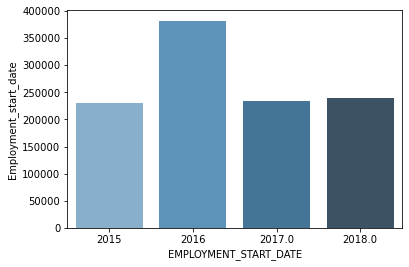

In [28]:
# Looking at the number of applications per year 

# Bar Chart of the number of applications 

#The plot explains about the number of visa applications was submitted yearly. We can the increase in number of applications from 2011 till 2016 but from 2017 there was a drop in number of applications.
#This can also help to analyse which presidential period the H1-B visa’s are offered more and not.

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
def number_of_applications(normalized_database_filename, conn):
    with create_connection(normalized_database_filename) as conn:
        df = pd.read_sql_query("""
                            SELECT CAST(EMPLOYMENT_START_DATE AS TEXT) as EMPLOYMENT_START_DATE , COUNT(*) AS Employment_start_date
                    FROM EMPLOYEE_CASE GROUP BY EMPLOYMENT_START_DATE """, conn)
    
        sns.barplot(data=df, x=df['EMPLOYMENT_START_DATE'], y = df['Employment_start_date'], palette="Blues_d" )
        plt.show()
number_of_applications(normalized_database_filename, conn)

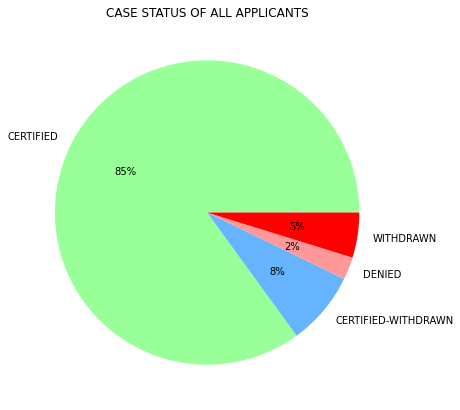

In [29]:
# Pie Chart shows the volume of case status,  from which can interpret that many applications were 
# approved whereas only few applications were denied of approving. Hence, this EDA will help us to 
# focus more on the denied ones which can be further improved to get it approved in later stages.

def case_status(normalized_database_filename, conn):
    with create_connection(normalized_database_filename) as conn:
        df = pd.read_sql_query("""
                            select s.STATUS_DESC, count(*) as soc_count from EMPLOYEE_CASE e join CASE_STATUS s on e.CASE_STATUS_ID = s.STATUS_ID group by s.STATUS_DESC; """, conn)
        
        colors = ['#99ff99', '#66b3ff', '#ff9999','#FF0000']
        fig = plt.figure(figsize=(10,7))
        plt.pie( df['soc_count'], labels=df['STATUS_DESC'],  autopct='%1.0f%%' , colors = colors )
        plt.title('CASE STATUS OF ALL APPLICANTS')
        plt.show()
        
case_status(normalized_database_filename, conn)

,JOB_TITLE,job_count
0,PROGRAMMER ANALYST,43619
1,SOFTWARE ENGINEER,27074
2,SOFTWARE DEVELOPER,16206
3,BUSINESS ANALYST,13719
4,SYSTEMS ANALYST,12889


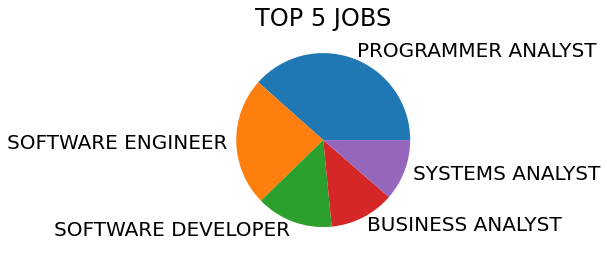

In [36]:
# The 5 most common job titles 

def top_5_jobs(normalized_database_filename, conn):
    with create_connection(normalized_database_filename) as conn:
        df = pd.read_sql_query("""
                            select s.JOB_TITLE, count(s.JOB_TITLE) as job_count from EMPLOYEE_CASE e join JOB s on s.JOB_ID = e.JOB_ID WHERE JOB_TITLE NOT IN ('CA','NY')
                           group by s.JOB_TITLE ORDER BY count(s.JOB_TITLE) desc limit 5 ;""", conn)
        plt.pie( df['job_count'], labels = df['JOB_TITLE'] )
        plt.title('TOP 5 JOBS')
        plt.show()
top_5_jobs(normalized_database_filename, conn)

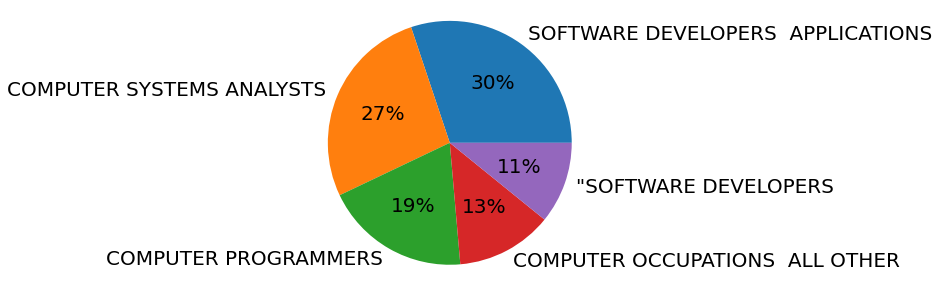

In [34]:
# Top 5 most common job sectors

def top_sector(normalized_database_filename, conn):
    with create_connection(normalized_database_filename) as conn:
        df = pd.read_sql_query(""" select s.SOC_NAME, count(s.SOC_NAME) as No_of_SOC from EMPLOYER 
        e join SOC s on e.SOC_ID = s.SOC_ID group by s.SOC_NAME ORDER BY count(s.SOC_NAME) DESC LIMIT 5; """, conn)
        

        fig = plt.figure(figsize=(10,5))
        plt.pie(df["No_of_SOC"], labels= df["SOC_NAME"],
        autopct='%1.0f%%', shadow=False )
        plt.axis('equal')
        plt.rcParams['font.size'] = 20
        plt.show()
top_sector(normalized_database_filename, conn)

In [42]:
import glob
import os
final = pd.concat(map(pd.read_csv, glob.glob(os.path.join('//Users//aparna_kamal//Downloads//New Folder With Items', "*.csv"))))

36889


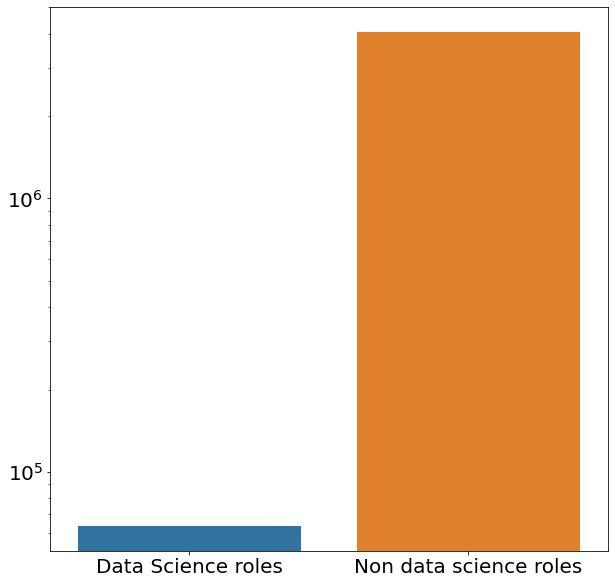

In [54]:
### Boxplot for data science and non data science for further studies regarding data science scope using pandas framework

# Looking at data science roles (related like business analyst, data analyst, data engineer) for H1B Visas
data_scientist = final.loc[final['JOB_TITLE']=='DATA SCIENTIST']
business_analyst = final.loc[final['JOB_TITLE']=='BUSINESS ANALYST']
data_analyst = final.loc[final['JOB_TITLE']=='DATA ANALYST']
data_engineer = final.loc[final['JOB_TITLE']=='DATA ENGINEER']
data_science_roles = pd.concat([data_scientist,business_analyst,data_analyst,data_engineer])

# Number of data science and similar roles h1b visas granted
print(data_science_roles.shape[0])

# Looking at the prevailing wages of data science jobs vs other h1b visa jobs
data_science_roles['PREVAILING_WAGE'].describe()

# Non-data science jobs' salaries
not_data_science = final[(final['JOB_TITLE'] != 'DATA SCIENTIST | BUSINESS ANALYST | DATA ANALYST | DATA ENGINEER')]
not_data_science['PREVAILING_WAGE'].value_counts()
fig = plt.figure(figsize=(10,10))
sns.barplot(x = ['Data Science roles','Non data science roles'],
            y = [63343,4067275])
ax = plt.gca()
ax.set_yscale('log')
plt.show()



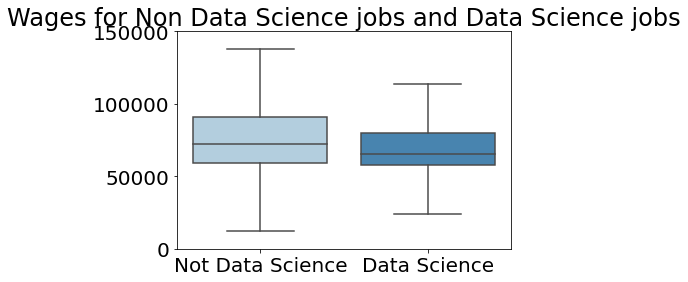

In [55]:
# Boxplot for data science and non data science wages
# Turning values into lists for plotting
data_science_roles = data_science_roles.reset_index(drop=True)
not_data_science = not_data_science.reset_index(drop=True)
plot_box_df = pd.concat([not_data_science['PREVAILING_WAGE'],data_science_roles['PREVAILING_WAGE']],
                        keys=['Not Data Science','Data Science'],axis=1)

sns.boxplot( data = plot_box_df, palette="Blues", showfliers=False)
axes = plt.gca()
axes.set_ylim([0,150000])
plt.title('Wages for Non Data Science jobs and Data Science jobs')
plt.show()

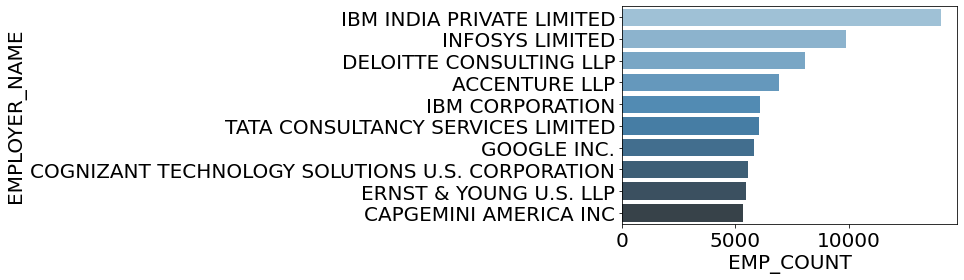

In [48]:
# Top 5 most common H1B Visa Companies

def sec(normalized_database_filename, conn):
    with create_connection(normalized_database_filename) as conn:
        df = pd.read_sql_query(""" select A.EMPLOYER_NAME,count(A.EMPLOYER_NAME) as EMP_COUNT from EMPLOYER A INNER JOIN EMPLOYEE_CASE B ON A.EMPLOYER_ID = B.EMPLOYER_ID
        group by A.EMPLOYER_NAME ORDER BY COUNT(A.EMPLOYER_NAME) DESC LIMIT 10; """, conn)
        
        sns.barplot(data=df, y = df['EMPLOYER_NAME'], x = df['EMP_COUNT'], palette="Blues_d" )
        plt.show()
sec(normalized_database_filename, conn)